In [1]:
import ROOT
from sys import exit
import numpy as np
from numpy.testing import assert_array_equal
from nose.tools import (raises, assert_raises, assert_true,
                        assert_equal, assert_almost_equal)
import root_numpy as rnp
import pandas as pd
ROOT.ROOT.EnableImplicitMT()

Welcome to JupyROOT 6.18/04


In [2]:
#read in relevant data from ttree
data = rnp.root2array("../data_02/mlTree.root","mltree",branches=['x','e1','e2','e3','e12','e13',
                                                                   'e23','e123','recoilID'])
print(data.shape)
assert_equal(data.dtype.names, ('x','e1','e2','e3','e12','e13','e23','e123','recoilID'))
print(data)

(444328,)
[(-210.13159  , 2039.188 , 1065.3593, 1071.864, 3104.5474, 3111.052 , 2137.2231, 4176.411 , 2)
 ( -54.554443 , 1369.8027,  662.1592,  479.864, 2031.9619, 1849.6667, 1142.0232, 2511.826 , 2)
 (   7.7700195, 1311.0847,  542.1592,  434.864, 1853.2439, 1745.9487,  977.0232, 2288.108 , 2)
 ...
 (  13.77002  , 1543.608 ,  675.3592,  606.864, 2218.9673, 2150.4722, 1282.2231, 2825.8313, 2)
 ( 221.39062  , 1338.095 ,  624.9592,  487.864, 1963.0542, 1825.959 , 1112.8232, 2450.9182, 2)
 ( 260.80908  , 1446.1361,  743.7592,  576.864, 2189.8953, 2023.0001, 1320.6233, 2766.7593, 2)]


In [3]:
#convert to pandas
res_df = pd.DataFrame(data=data)
print(res_df)

                 x           e1           e2           e3          e12  \
0      -210.131592  2039.187988  1065.359253  1071.864014  3104.547363   
1       -54.554443  1369.802734   662.159180   479.864014  2031.961914   
2         7.770020  1311.084717   542.159180   434.864014  1853.243896   
3        39.258057  1446.136108   606.959229   525.864014  2053.095215   
4      -140.597900  1341.618164   641.759216   502.864014  1983.377441   
...            ...          ...          ...          ...          ...   
444323  -53.412842  1439.089966   611.759216   492.864014  2050.849121   
444324   19.676514  1408.556641   597.359192   505.864014  2005.915771   
444325   13.770020  1543.608032   675.359192   606.864014  2218.967285   
444326  221.390625  1338.094971   624.959229   487.864014  1963.054199   
444327  260.809082  1446.136108   743.759216   576.864014  2189.895264   

                e13          e23         e123  recoilID  
0       3111.052002  2137.223145  4176.411133        

In [4]:
print(res_df.shape)

(444328, 9)


In [5]:
#look at data loaded
import matplotlib.pyplot as plt
#plt.hist(data)
plt.figure(figsize=(10,6))
plt.hist2d('e13','e1',bins=(500,500), cmax=100,cmap="afmhot",data=res_df)
plt.savefig("../figs/test.png")

In [6]:
#convert data to range from 0-1
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
data_preproc = Pipeline([('stdscaler', StandardScaler()), ('minmax', MinMaxScaler(feature_range=(0, 1)))])
print(res_df.shape)
print(res_df)
data_postproc = data_preproc.fit_transform(res_df)
print(data_postproc.shape)
print(data_postproc)

(444328, 9)
                 x           e1           e2           e3          e12  \
0      -210.131592  2039.187988  1065.359253  1071.864014  3104.547363   
1       -54.554443  1369.802734   662.159180   479.864014  2031.961914   
2         7.770020  1311.084717   542.159180   434.864014  1853.243896   
3        39.258057  1446.136108   606.959229   525.864014  2053.095215   
4      -140.597900  1341.618164   641.759216   502.864014  1983.377441   
...            ...          ...          ...          ...          ...   
444323  -53.412842  1439.089966   611.759216   492.864014  2050.849121   
444324   19.676514  1408.556641   597.359192   505.864014  2005.915771   
444325   13.770020  1543.608032   675.359192   606.864014  2218.967285   
444326  221.390625  1338.094971   624.959229   487.864014  1963.054199   
444327  260.809082  1446.136108   743.759216   576.864014  2189.895264   

                e13          e23         e123  recoilID  
0       3111.052002  2137.223145  4176.41

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=3,whiten=True)

In [9]:
pca.fit(data_postproc)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [10]:
print(pca.explained_variance_ratio_)

[0.74473244 0.17452657 0.0659252 ]


In [11]:
print(pca.singular_values_)

[291.45617802 141.0924922   86.7159225 ]


In [12]:
print(pca.components_)

[[-2.02031257e-01  4.17069191e-01  2.24821183e-01  3.62080213e-01
   3.82499076e-01  4.05594544e-01  3.64454920e-01  3.95348752e-01
  -6.04112046e-02]
 [-1.93304096e-01 -5.47585888e-03 -5.55041908e-04  2.58360107e-02
  -3.18298532e-03  1.32626653e-02  1.49933833e-02  9.12942327e-03
   9.80531262e-01]
 [ 9.60112457e-01  8.70098682e-02  4.65021288e-02  8.17315807e-02
   7.94904389e-02  8.83795464e-02  7.94502337e-02  8.49524018e-02
   1.84694153e-01]]


In [13]:
data_trans = pca.transform(data_postproc)

In [14]:
print(data_trans)

[[ 1.124318    0.04056179 -0.01987545]
 [-0.74999388 -0.14283866 -0.4179705 ]
 [-0.99918689 -0.19531967 -0.21537438]
 ...
 [-0.41051938 -0.17858484  0.24461342]
 [-0.9161681  -0.34286437  1.15121982]
 [-0.59700204 -0.35949148  1.62163328]]


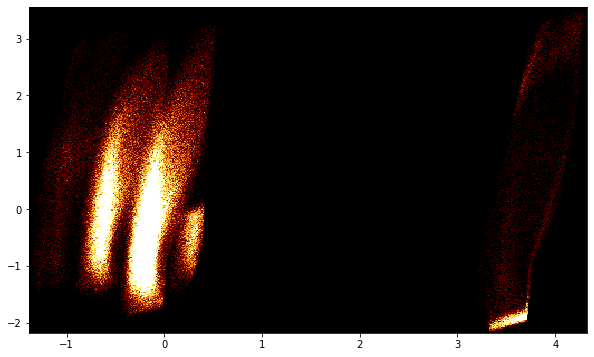

In [16]:
plt.figure(figsize=(10,6))
plt.hist2d(data_trans[:,1], data_trans[:,0],bins=(500,500), cmax=20,cmap="afmhot")
plt.savefig("../figs/test.png")

[0.74473244 0.17452657]


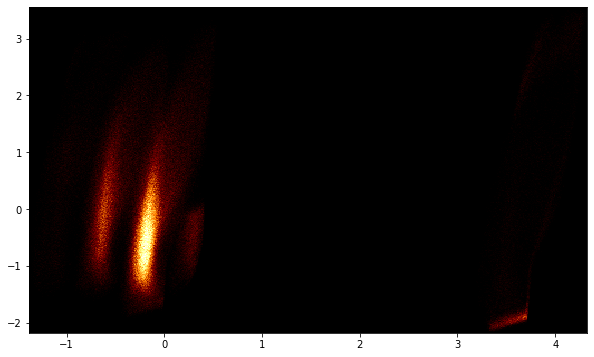

In [16]:
pca = PCA(n_components=2, whiten=True, svd_solver='full')
pca.fit(data_postproc)
print(pca.explained_variance_ratio_)
data_trans = pca.transform(data_postproc)
plt.figure(figsize=(10,6))
plt.hist2d(data_trans[:,1], data_trans[:,0],bins=(500,500), cmax=100,cmap="afmhot")
plt.savefig("../figs/test.png")

[0.74473244 0.17452657]


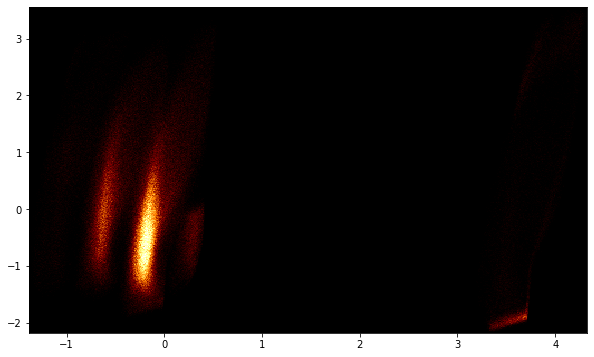

In [17]:
pca = PCA(n_components=2, whiten=True, svd_solver='randomized')
pca.fit(data_postproc)
print(pca.explained_variance_ratio_)
data_trans = pca.transform(data_postproc)
plt.figure(figsize=(10,6))
plt.hist2d(data_trans[:,1], data_trans[:,0],bins=(500,500), cmax=100,cmap="afmhot")
plt.savefig("../figs/test.png")